# Python Exercise : Linear Regression

## Implement a linear regression model using scikit-learn to predict house prices based on a dataset. Train the model using the training data and evaluate its performance on the test data. Calculate the mean squared error (MSE) as the evaluation metric.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from boruta import BorutaPy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Shivam\Python Ex\ex-10\house price.csv')

In [3]:
print(df.shape)
print('-'*120)
df.head()

(1460, 81)
------------------------------------------------------------------------------------------------------------------------


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory data analysis

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#checking the duplicacy
df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
#checking missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

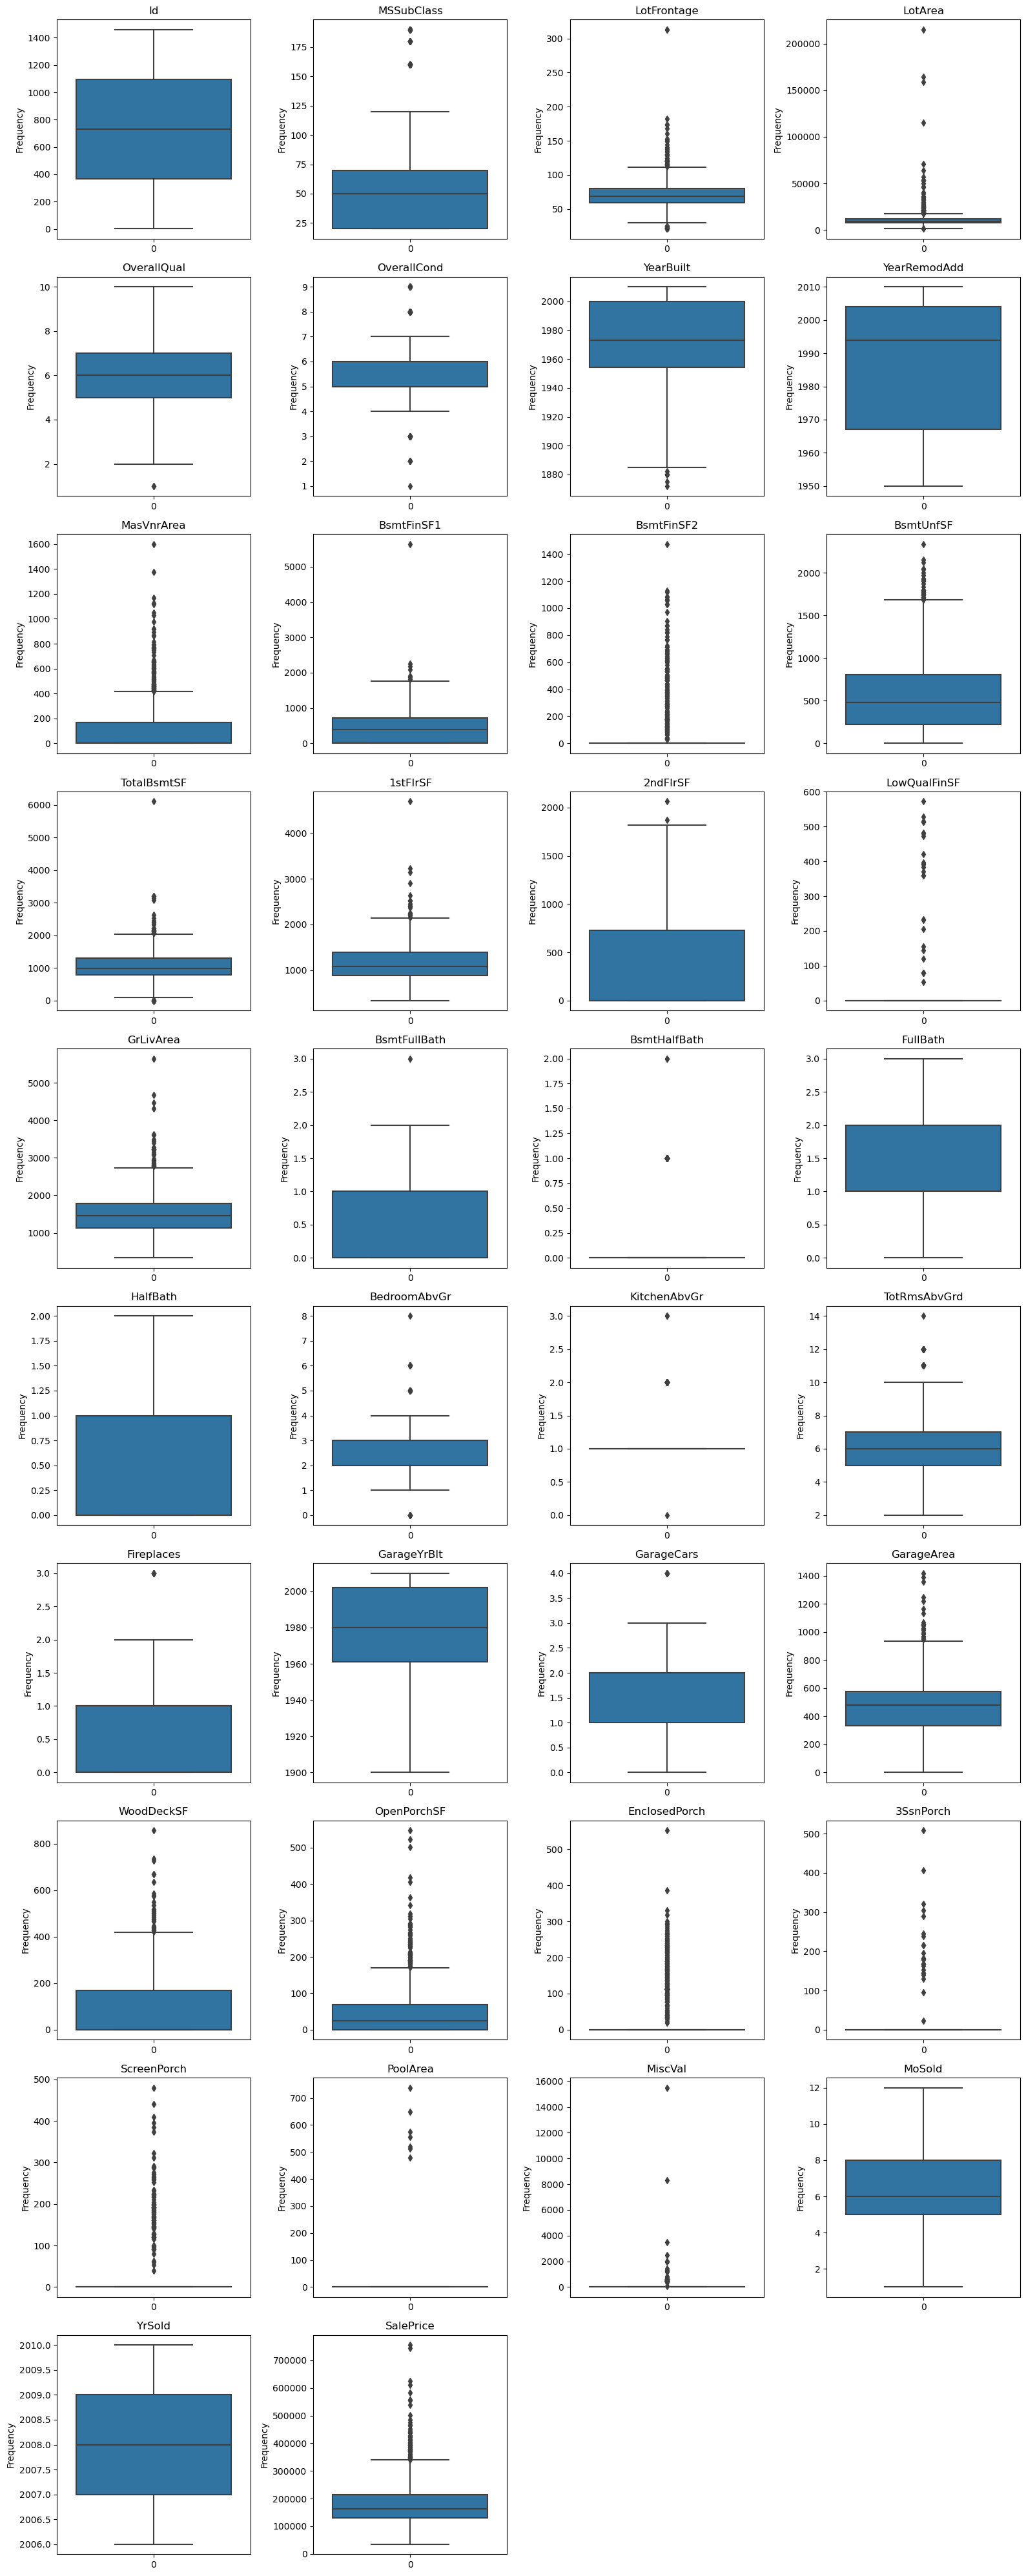

In [8]:
columns = [col for col in df.columns if df[col].dtypes == 'int64' or df[col].dtypes == 'float64']
# Set the number of rows and columns for the subplot grid
num_rows = len(columns) // 4 + int(len(columns) % 4 != 0)
num_cols = 4

# Create a new figure and set the size
plt.figure(figsize=(16, 4*num_rows))

# Loop through each column and create a distribution plot in a new subplot
for i, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
    
plt.tight_layout()  # Adjust the spacing between subplots to avoid overlapping
plt.show()

In [9]:
#imputing missing values with median
columns = [col for col in df.columns if df[col].dtypes != 'object']
imputer = SimpleImputer(strategy='median')
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

In [10]:
#imputing missing values with mode
columns = [col for col in df.columns if df[col].dtypes == 'object']
imputer = SimpleImputer(strategy='most_frequent') 
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

## One hot encoding

In [11]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = encoder.fit_transform(df[col])

## Feature selection

In [12]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

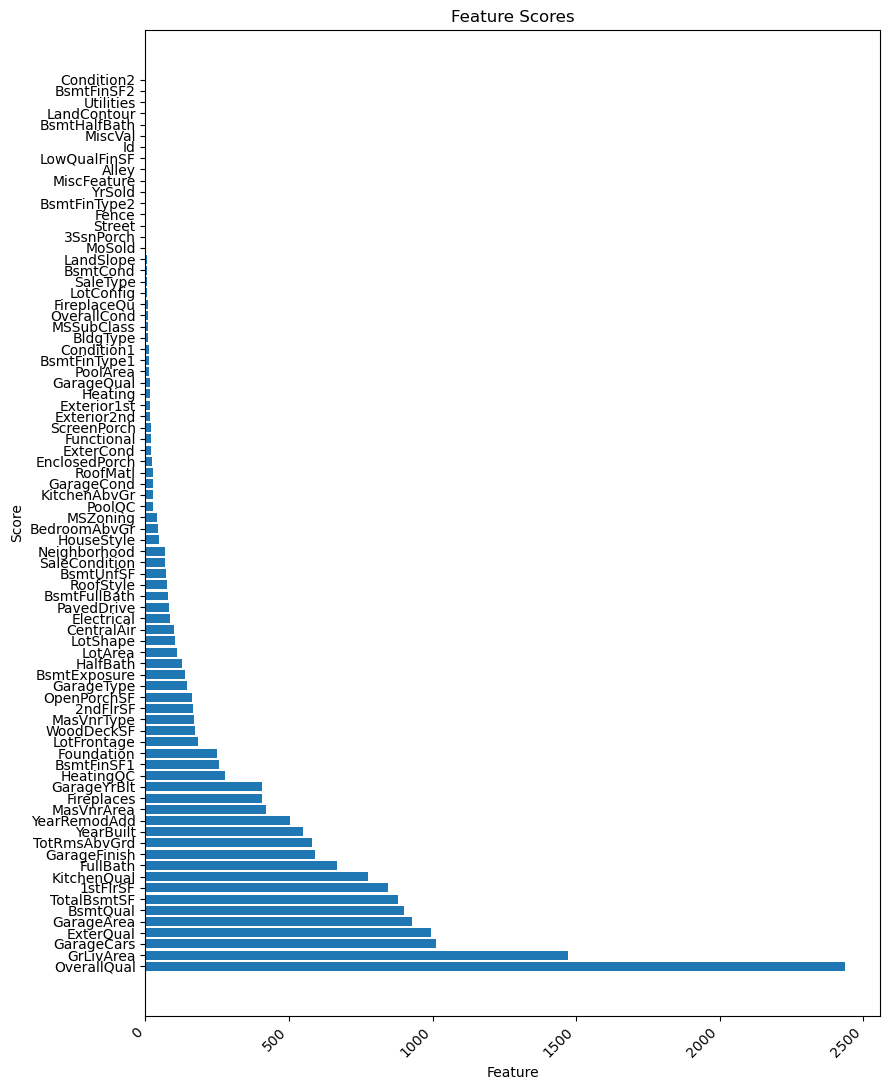

Selected features: Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# Initialize SelectKBest with the desired number of features (K)
k_best = SelectKBest(score_func=f_regression, k=20)  # Select top 5 features

# Fit and transform the data to select the best features
X_best = k_best.fit_transform(x, y)

feature_scores = k_best.scores_

# Create a DataFrame to display the scores with corresponding feature names
scores_df = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

# Sort the DataFrame by score in descending order
scores_df = scores_df.sort_values(by='Score', ascending=False)

# Plot the feature scores
plt.figure(figsize=(9, 11))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.tight_layout()
plt.show()

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_indices]

print("Selected features:", selected_features)


In [14]:
df = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual','Foundation', 'BsmtQual', 'BsmtFinSF1',
   'TotalBsmtSF', 'HeatingQC','1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd','Fireplaces',
   'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageArea','SalePrice']]

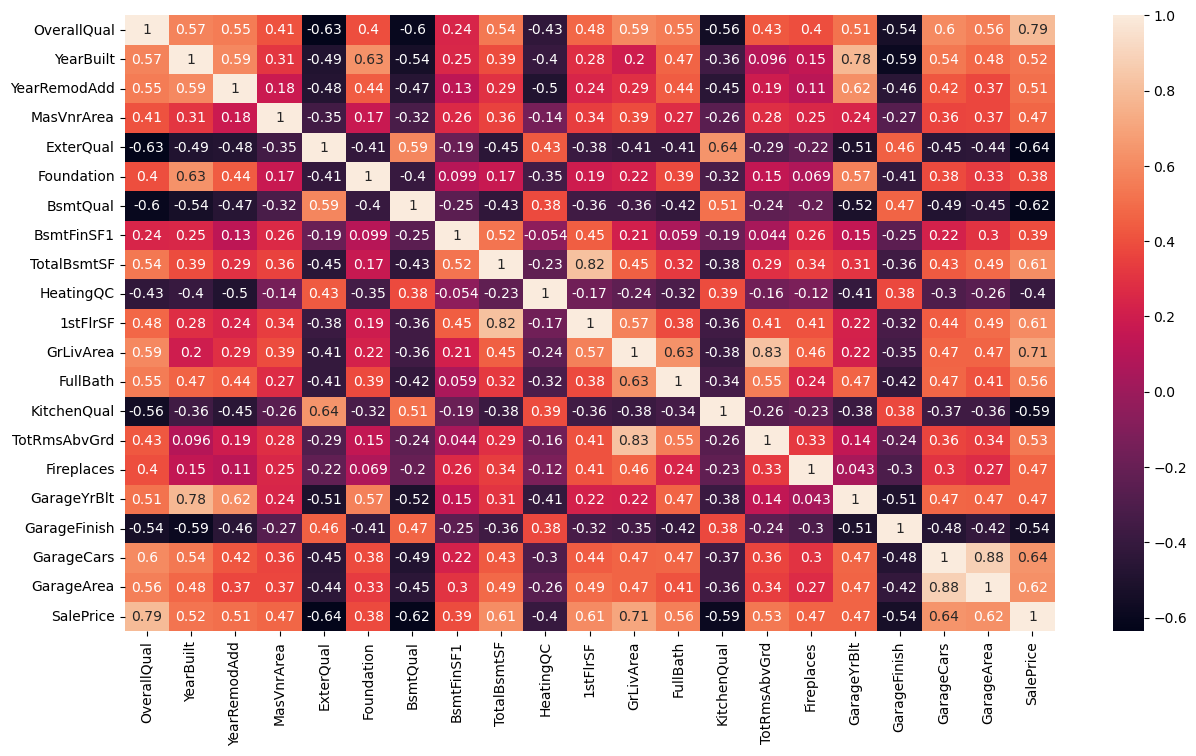

In [15]:
# plotting correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

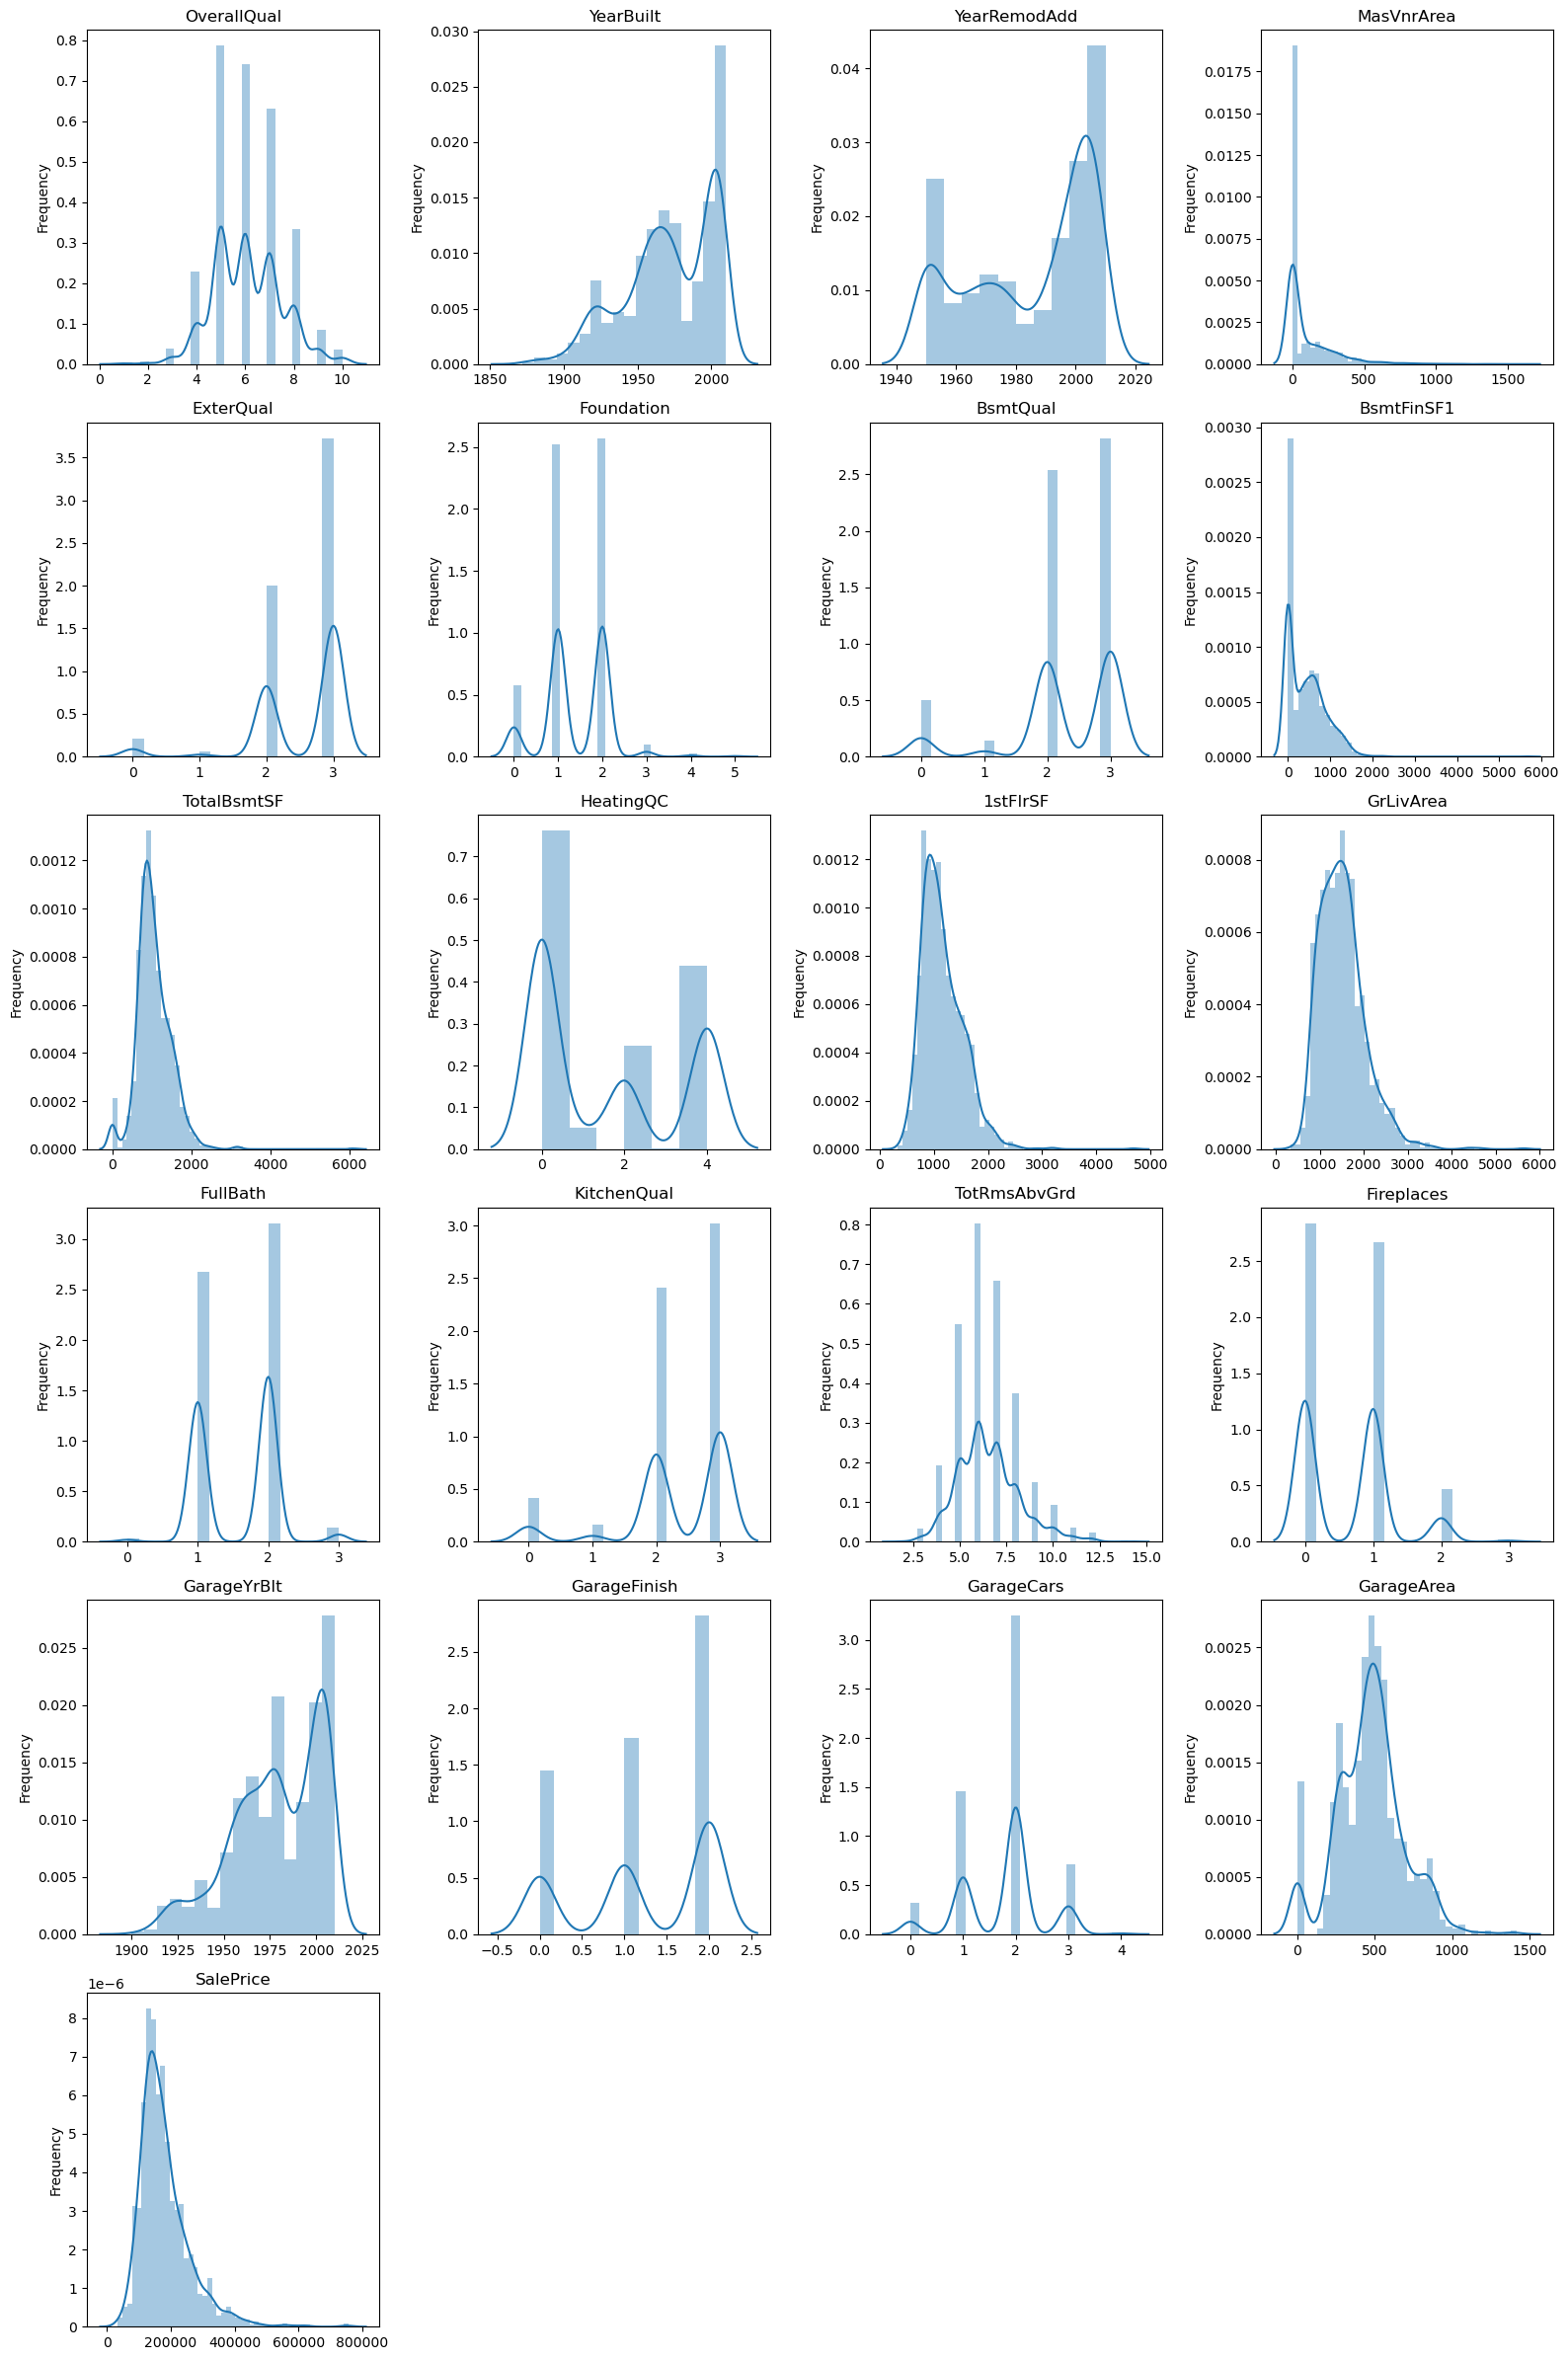

In [16]:
columns = df.columns
# Set the number of rows and columns for the subplot grid
num_rows = len(columns) // 4 + int(len(columns) % 4 != 0)
num_cols = 4

# Create a new figure and set the size
plt.figure(figsize=(16, 4*num_rows))

# Loop through each column and create a distribution plot in a new subplot
for i, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.distplot(df[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
    
plt.tight_layout()  # Adjust the spacing between subplots to avoid overlapping
plt.show()

In [17]:
# applying log transformation to avoid skewness
for col in columns:
    df[col] = np.log(df[col]).astype(str).str.replace('-inf','0').astype(float)

In [18]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [20]:
#imputing missing values with median
columns = x.columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

## Removing outlier

In [21]:
# Define the z-score threshold for outlier detection
z_threshold = 3

col_with_out = x.columns

# Calculate z-scores for each column in the DataFrame
z_scores = np.abs((df[col_with_out] - df[col_with_out].mean()) / df[col_with_out].std())

# Create a Boolean mask where True indicates an outlier
outlier_mask = z_scores > z_threshold

# Remove rows containing outliers
df = df[~outlier_mask.any(axis=1)]


## Linear Regression

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [23]:
Linear_Regression = LinearRegression()

In [24]:
Linear_Regression.fit(x_train,y_train)

LinearRegression()

In [26]:
x_test_pred = Linear_Regression.predict(x_test)
mse = mean_squared_error(y_test,x_test_pred)
print('Mean squared error: ',mse)

Mean squared error:  0.02390866775168738
